In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [115]:
df_wind=pd.read_csv("D:/UNIVERSITY OF VERONA/Second Year/Statistical models for data science/Project/WindEnergy.csv",index_col='utc_timestamp')
df_wind.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [116]:
df_wind.info()
print('----------------------------------------------------------')
print(f'The shape of the dataframe is : {df_wind.shape}')

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wind_generation_actual  1094 non-null   float64
 1   wind_capacity           1094 non-null   float64
 2   temperature             1094 non-null   float64
dtypes: float64(3)
memory usage: 34.2+ KB
----------------------------------------------------------
The shape of the dataframe is : (1094, 3)


So, we have zero null value in our data set.

In [117]:
df_wind.isna().sum()

wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

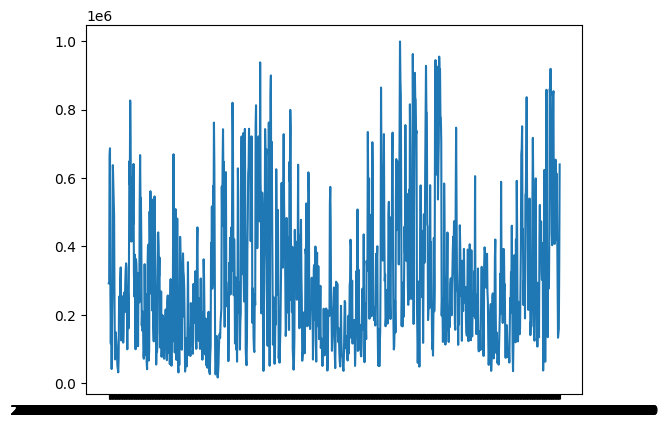

In [118]:
plt.plot(df_wind['wind_generation_actual'])
#df_wind['wind_capacity'].plot()


In [119]:
#
df_wind.corr()

,wind_generation_actual,wind_capacity,temperature
wind_generation_actual,1.000000,0.127708,-0.325831
wind_capacity,0.127708,1.000000,0.112132
temperature,-0.325831,0.112132,1.000000


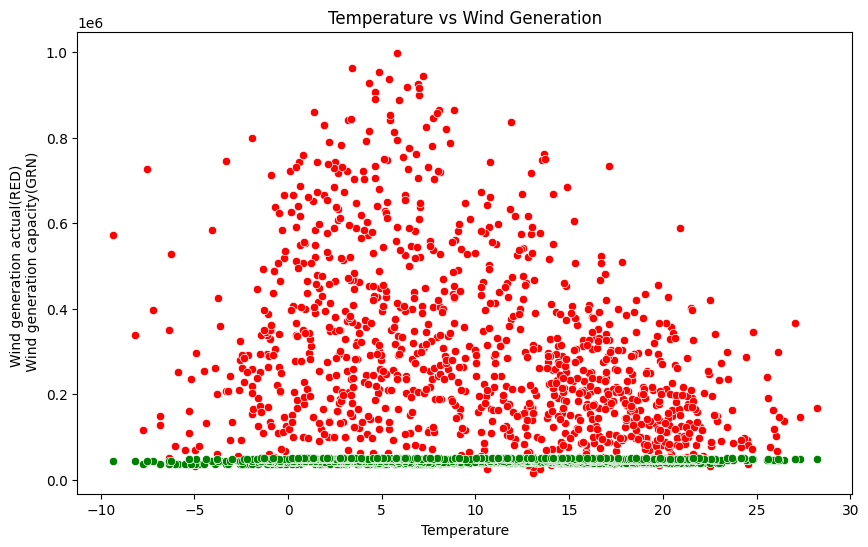

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature',y='wind_generation_actual', data=df_wind,c='r')
sns.scatterplot(x='temperature',y='wind_capacity', data=df_wind,c='g')
plt.title('Temperature vs Wind Generation')
plt.xlabel('Temperature')
plt.ylabel('Wind generation actual(RED) \n Wind generation capacity(GRN)')
plt.show()


In [121]:
df_wind.index = pd.to_datetime(df_wind.index)
#df_wind['period'] = df_wind.index.to_period('M') # Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)
df_wind

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
...,...,...,...
2019-12-26 00:00:00+00:00,132739.0,50424.125,2.790
2019-12-27 00:00:00+00:00,146590.0,50427.000,1.327
2019-12-28 00:00:00+00:00,159126.0,50427.292,-1.441


Text(0, 0.5, 'wind')

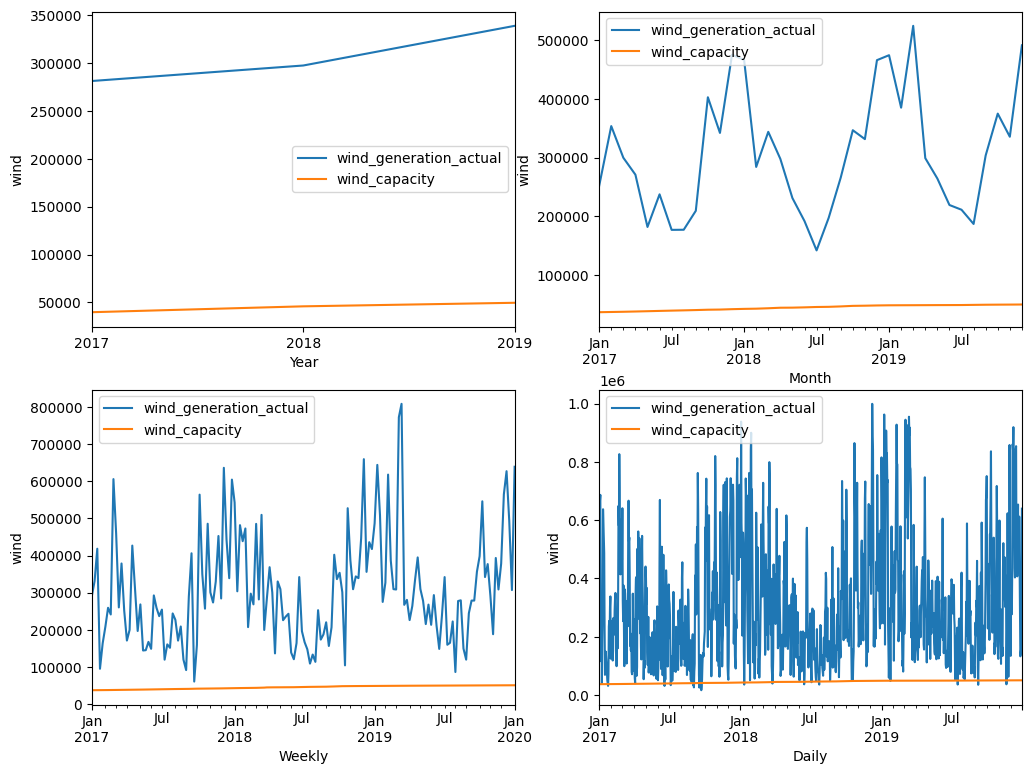

In [122]:
wind_plot = ["wind_generation_actual","wind_capacity"]

fig,ax=plt.subplots(2,2,figsize=(12,9))
df_wind[wind_plot].resample("Y").mean().plot(kind="line",lw = 1.5,ax=ax[0, 0])
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('wind')

df_wind[wind_plot].resample("M").mean().plot(kind="line",lw = 1.5,ax=ax[0, 1])
ax[0,1].set_xlabel('Month')
ax[0,1].set_ylabel('wind')


df_wind[wind_plot].resample("W").mean().plot(kind="line",lw = 1.5,ax=ax[1, 0])
ax[1,0].set_xlabel('Weekly')
ax[1,0].set_ylabel('wind')


df_wind[wind_plot].resample("D").mean().plot(kind="line",lw = 1.5,ax=ax[1, 1])
ax[1,1].set_xlabel('Daily')
ax[1,1].set_ylabel('wind')


In [123]:
df_wind_ws=df_wind.resample("W").mean()
df_wind_ws

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.000000,37149.130000,-2.117000
2017-01-08 00:00:00+00:00,331270.714286,37167.065429,-2.840286
2017-01-15 00:00:00+00:00,418425.000000,37217.595143,-0.973857
2017-01-22 00:00:00+00:00,94920.000000,37281.714429,-5.871000
2017-01-29 00:00:00+00:00,163572.571429,37393.916857,-4.351286
...,...,...,...
2019-12-08 00:00:00+00:00,565128.000000,50306.738143,2.275571
2019-12-15 00:00:00+00:00,627373.571429,50327.809571,2.652857
2019-12-22 00:00:00+00:00,493695.285714,50375.101286,5.718429


In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Time Series Decomposition
decomposition = seasonal_decompose(df_wind_ws['wind_generation_actual'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

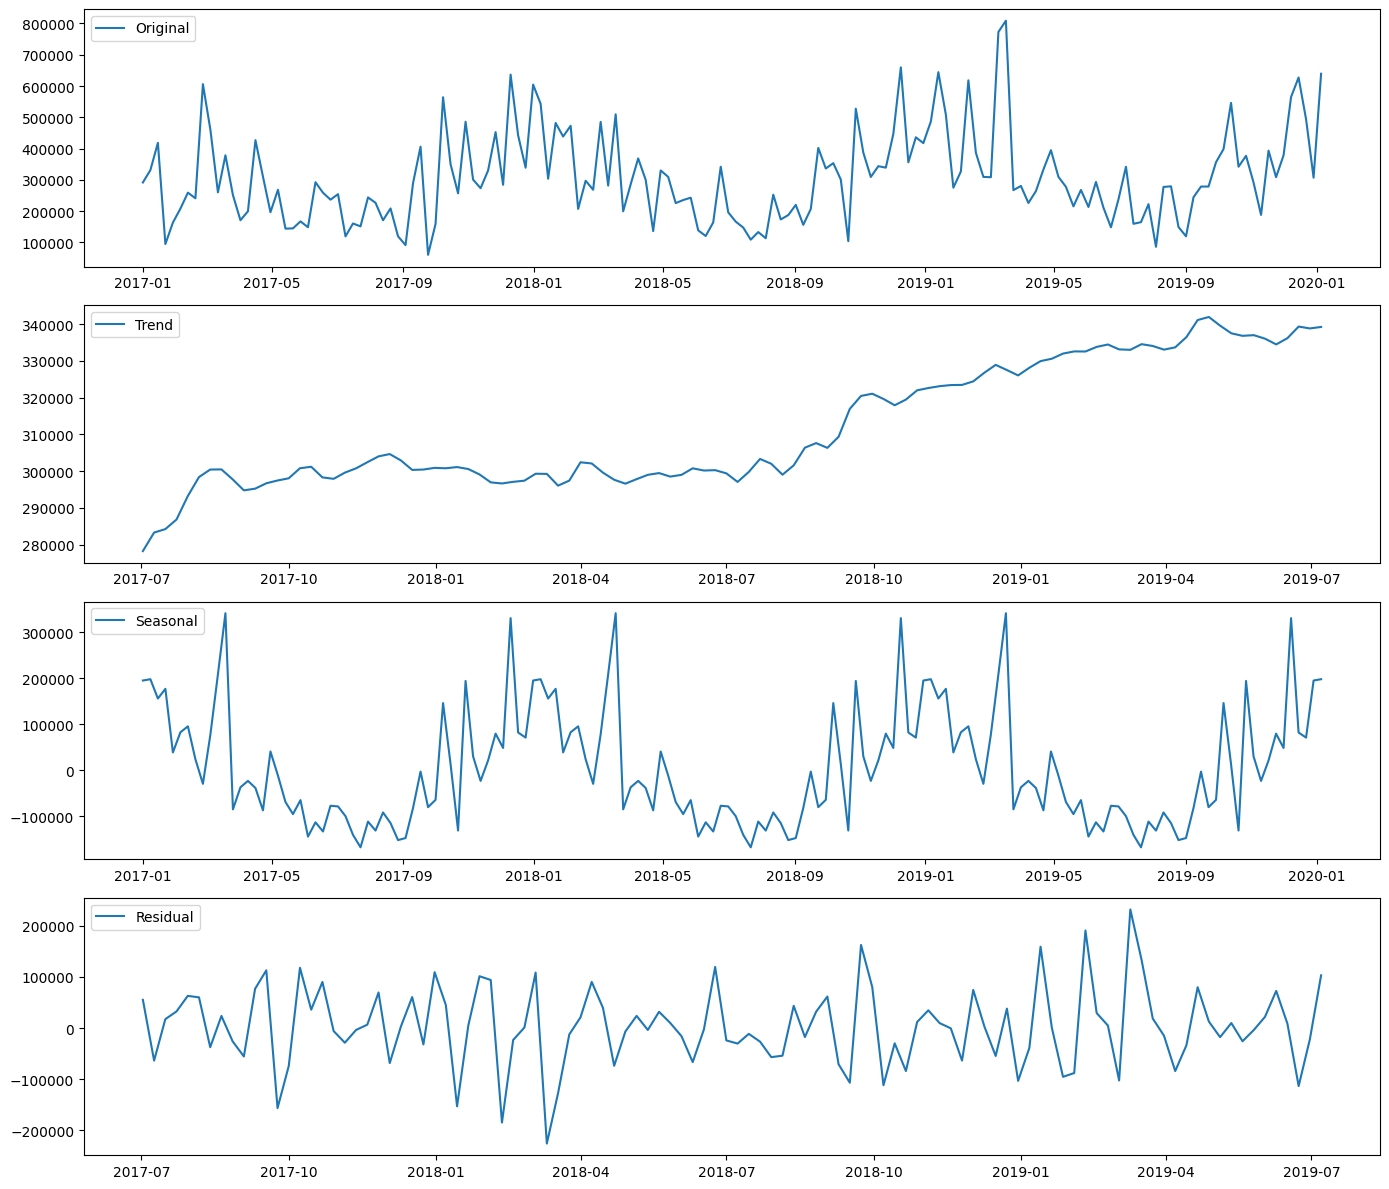

In [125]:
# Plot the decomposed components
plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(df_wind_ws['wind_generation_actual'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

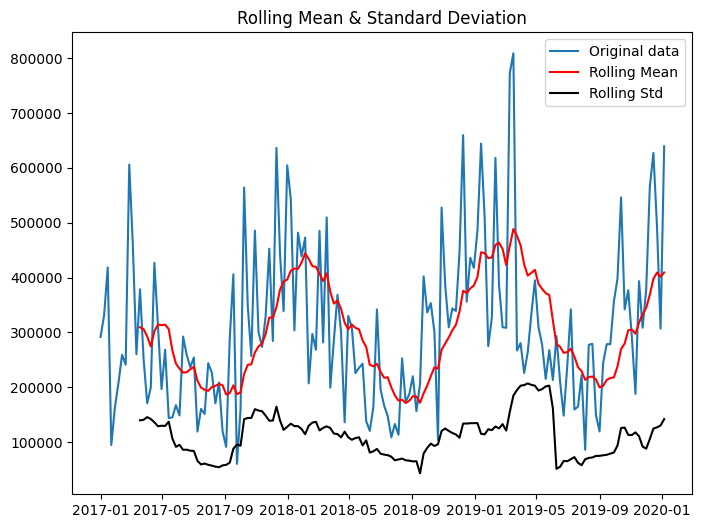

In [126]:
stationarity_check = df_wind_ws['wind_generation_actual']

# Rolling statistics
rolling_mean = stationarity_check.rolling(12).mean()
rolling_std = stationarity_check.rolling(12).std()
plt.figure(figsize=(8,6))
plt.plot(stationarity_check, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

The consistent pattern observed in the rolling mean and standard deviation across years suggests that while they may vary within a year, this variation tends to repeat in subsequent years. This consistent behavior implies stationarity.

## UNIT ROOT TESTS

In [127]:
from statsmodels.tsa.stattools import adfuller ,kpss
# Check stationarity
adf_test = adfuller(df_wind_ws['wind_generation_actual'])
print(f'p-value: {adf_test[1]}')

p-value: 0.23432323273161992


ADF (Augmented Dickey-Fuller)

In [128]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(W_gen):
    result=adfuller(W_gen)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [129]:
adfuller_test(df_wind_ws['wind_generation_actual'])

ADF Test Statistic : -2.12565821829202
p-value : 0.23432323273161992
#Lags Used : 5
Number of Observations Used : 152
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

In [130]:
kpss_test = kpss(df_wind_ws['wind_generation_actual'], regression='c', nlags='auto', store=True)
print('KPSS Statistic:', kpss_test[0])
print('p-value: ', kpss_test[1])


KPSS Statistic: 0.20710233468702915
p-value:  0.1


Both tests conclude that the series is stationary.

In [135]:
# Train and test
df_wind_ws_train = df_wind_ws[:-12]['wind_generation_actual']
df_wind_ws_test = df_wind_ws[-12:]['wind_generation_actual']


## ACF PLOT

In [136]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

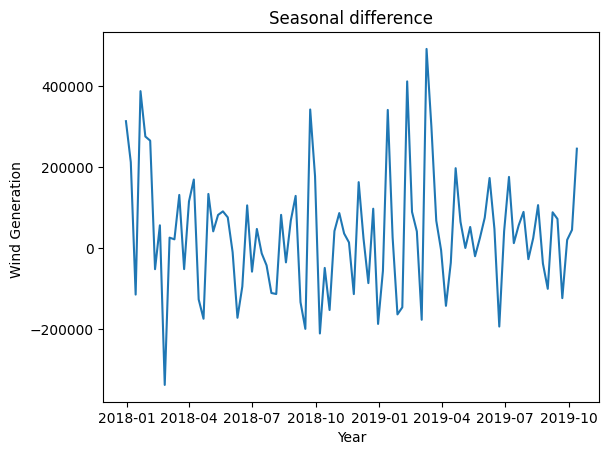

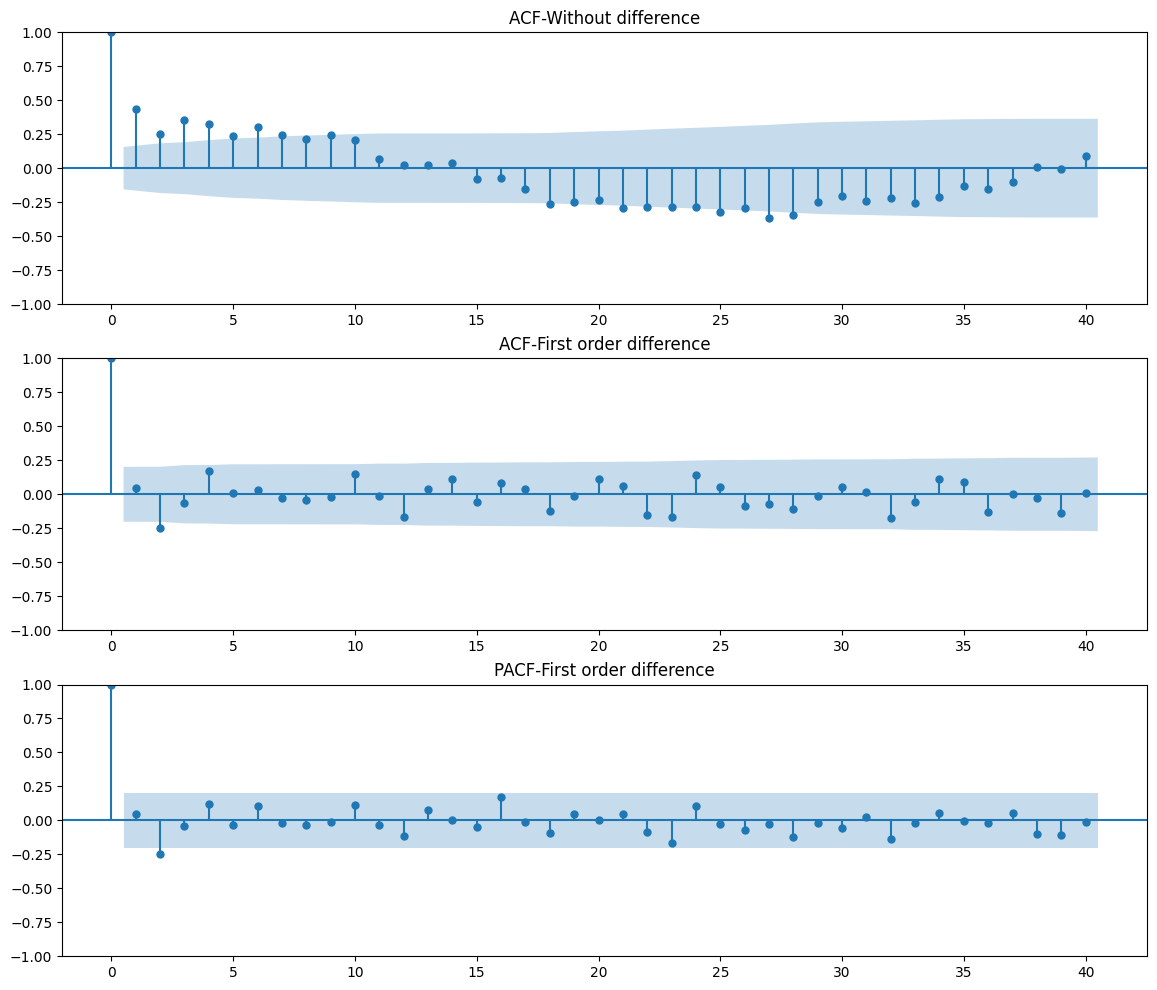

In [137]:
# Seasonal differencing
df_wind_ws_train_sd = df_wind_ws_train.diff(52)
df_wind_ws_train_sd.dropna(inplace=True)

df_wind_ws_test_sd = df_wind_ws_test.diff(52)
df_wind_ws_test_sd.dropna(inplace=True)

plt.plot(df_wind_ws_train_sd.index, df_wind_ws_train_sd)
plt.title('Seasonal difference')
plt.xlabel('Year')
plt.ylabel('Wind Generation ')

fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df_wind_ws['wind_generation_actual'],lags=40,title='ACF-Without difference',ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(df_wind_ws_train_sd,lags=40,title='ACF-First order difference',ax=ax2)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(df_wind_ws_train_sd,lags=40,title='PACF-First order difference',ax=ax2)

In [138]:
from statsmodels.tsa.stattools import adfuller ,kpss
# Check stationarity
adf_test = adfuller(df_wind_ws_train_sd)
print(f'ADfuller test p-value: {adf_test[1]}')


kpss_test = kpss(df_wind_ws_train_sd, regression='c', nlags='auto', store=True)

print('KPSS Statistic:', kpss_test[0])
print('KPSS p-value: ', kpss_test[1])


ADfuller test p-value: 4.075223156282339e-14
KPSS Statistic: 0.12433408339524823
KPSS p-value:  0.1


In [139]:
df_wind_ws_train_sd

utc_timestamp
2017-12-31 00:00:00+00:00    312937.428571
2018-01-07 00:00:00+00:00    211880.571429
2018-01-14 00:00:00+00:00   -114732.285714
2018-01-21 00:00:00+00:00    387013.428571
2018-01-28 00:00:00+00:00    275120.428571
                                 ...      
2019-09-15 00:00:00+00:00     71835.714286
2019-09-22 00:00:00+00:00   -123492.000000
2019-09-29 00:00:00+00:00     20169.571429
2019-10-06 00:00:00+00:00     44905.285714
2019-10-13 00:00:00+00:00    245113.428571
Freq: W-SUN, Name: wind_generation_actual, Length: 94, dtype: float64

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   94
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1102.084
Date:                              Tue, 13 Feb 2024   AIC                           2214.168
Time:                                      17:28:18   BIC                           2226.201
Sample:                                  12-31-2017   HQIC                          2218.999
                                       - 10-13-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3886.5060   1.06e+04      0.365      0.715    -1.7e+04    2.48e+04
ma.L1          0.01

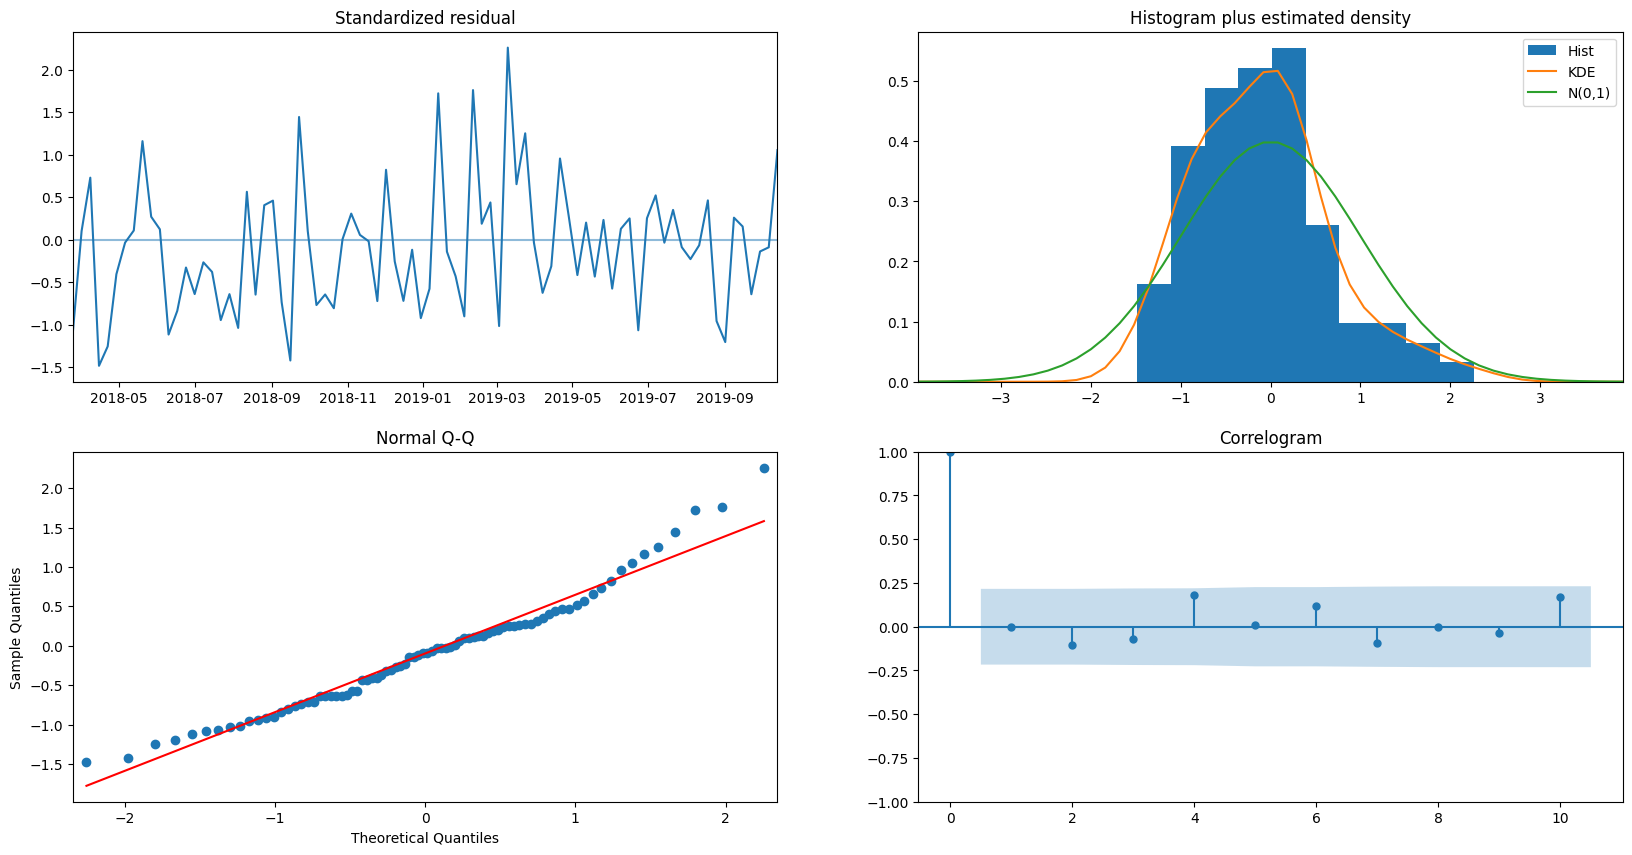

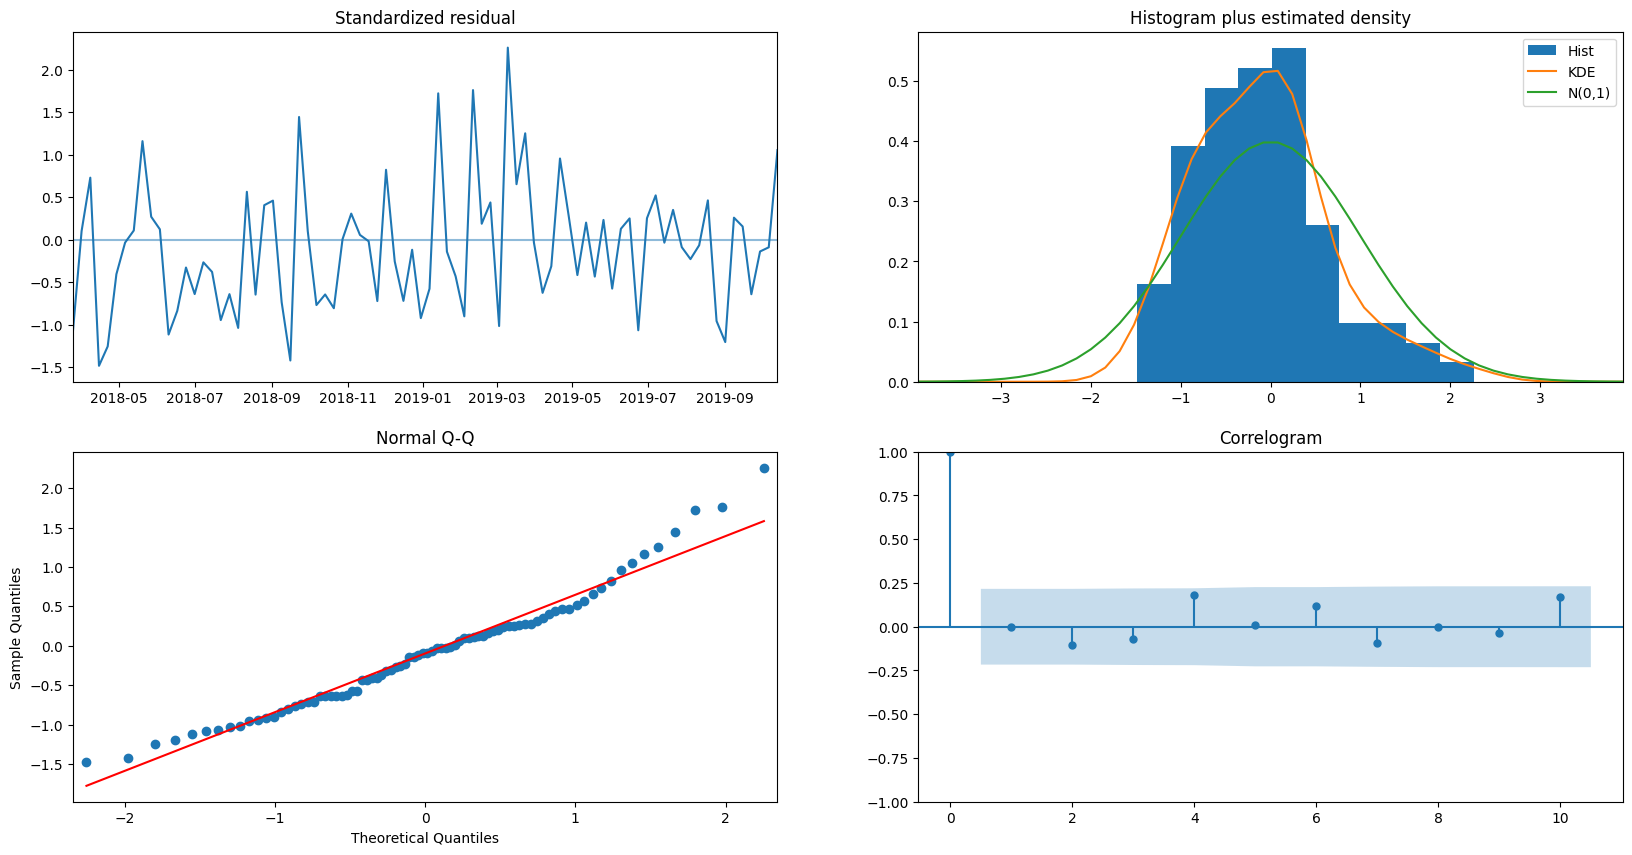

In [141]:
# Auto ARIMA model
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(df_wind_ws_train_sd,start_p=0, start_q=0, d=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0,max_P =3, max_Q =3, D = 1, seasonal=True, suppress_warnings=True,stepwise=False)
print(auto_arima_model.summary())
auto_arima_model.plot_diagnostics(figsize=(20,10))


                                      SARIMAX Results                                       
Dep. Variable:               wind_generation_actual   No. Observations:                   94
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -896.501
Date:                              Tue, 13 Feb 2024   AIC                           1801.002
Time:                                      17:28:29   BIC                           1809.820
Sample:                                  12-31-2017   HQIC                          1804.491
                                       - 10-13-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0086      0.220      0.039      0.969      -0.423       0.440
ma.L2         -0.35

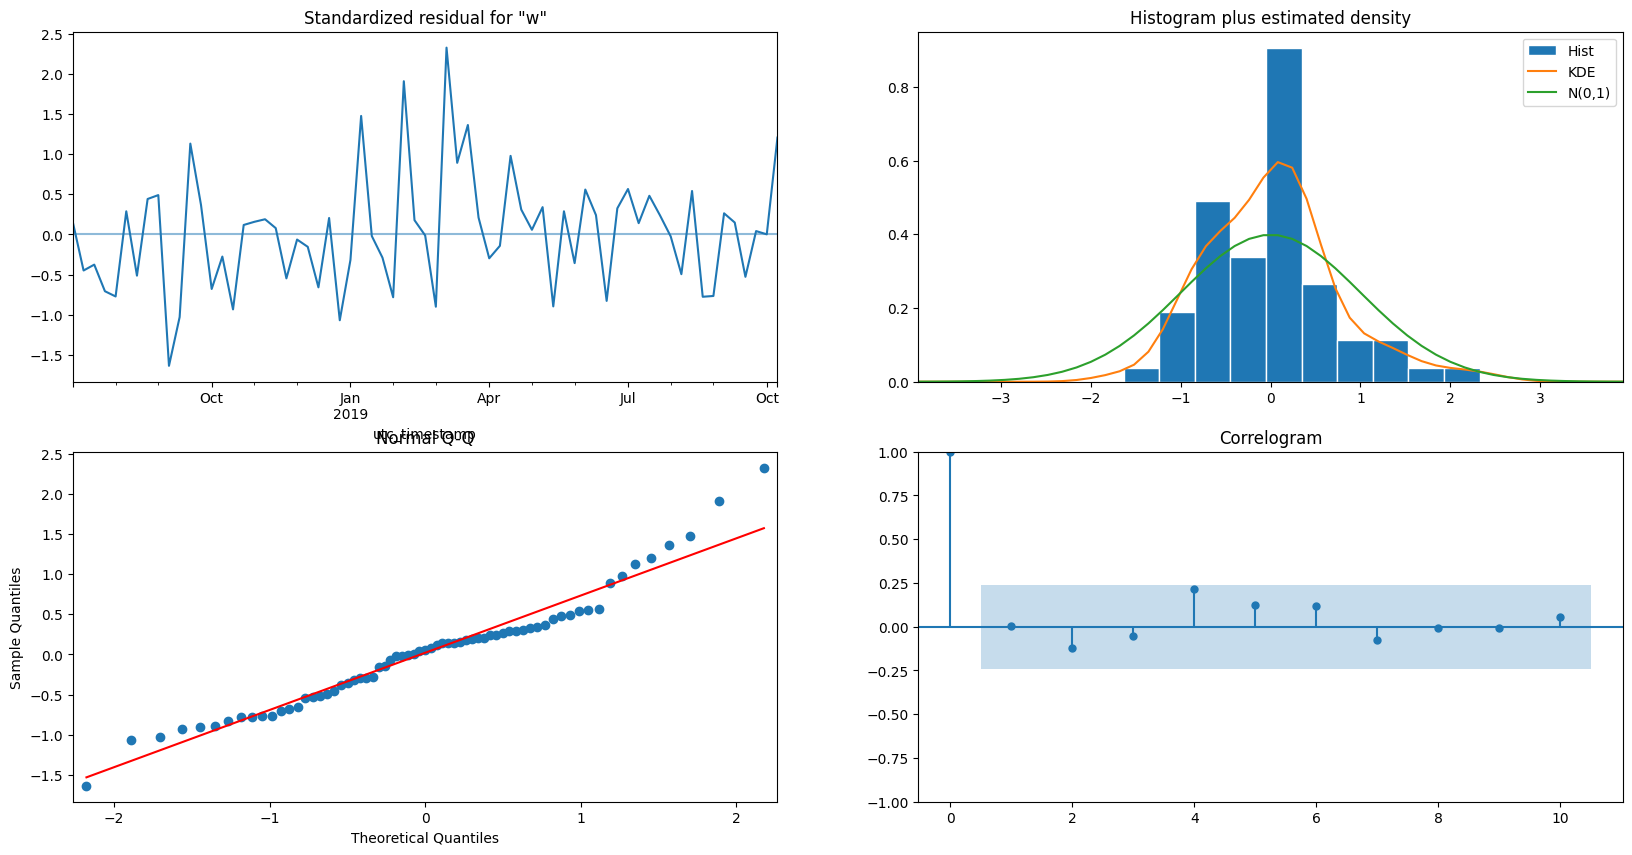

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the model with the selected parameters - Automatic SARIMA model
[p,d,q] = [0,0,2] #[stepwise_model.order[0], stepwise_model.order[0], stepwise_model.order[2]]
[P,D,Q,S] = [0,1,1,12] #[stepwise_model.seasonal_order[0], stepwise_model.seasonal_order[1], stepwise_model.seasonal_order[2],stepwise_model.seasonal_order[3]]
model_SARIMA_auto = SARIMAX(df_wind_ws_train_sd,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA_auto = model_SARIMA_auto.fit()

# Verify the residuals
print(result_SARIMA_auto.summary())
result_SARIMA_auto.plot_diagnostics(figsize=(20, 10));

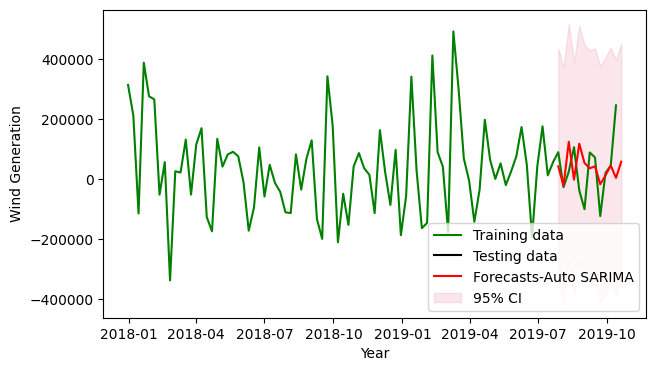

In [147]:
# Forecasting with Auto SARIMA model - Test set
model_auto = result_SARIMA_auto.get_prediction(start=82, end=94)
df_auto = model_auto.summary_frame()
plt.figure(figsize=(7, 4))
plt.plot(df_wind_ws_train_sd, color='green',label='Training data')
plt.plot(df_wind_ws_test_sd, color='black', label='Testing data')
plt.plot(df_auto['mean'], color='red', label='Forecasts-Auto SARIMA')
plt.fill_between(df_auto.index, df_auto['mean_ci_lower'], df_auto['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Wind Generation')
plt.legend();